In [146]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

lists = pd.read_excel("./TII SC data.xlsx",engine='openpyxl')
color1 = ['#8ECFC9', '#FFBE7A', '#FA7F6F', '#82B0D2', '#BEB8DC', '#E7DAD2', '#999999']
color2 = ['#2878B5', '#9AC9DB', '#F8AC8C', '#C82423', '#FF8884']
color3 = ['r', 'g','b','orange','y']
ft = 40

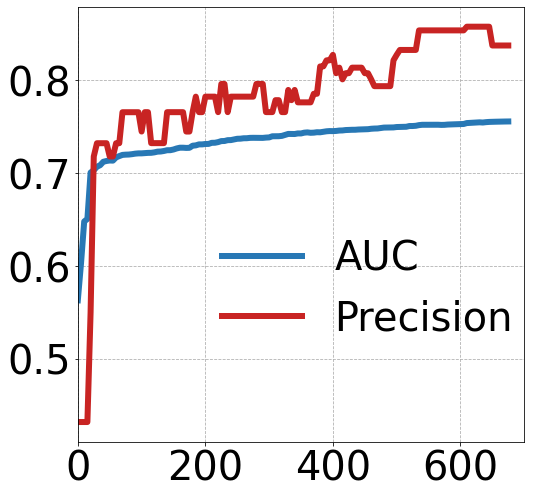

In [147]:
# fig 2 
# 特征数量和训练效果的关系
x = list(range(0,136*5,5))
auc = lists.iloc[58,:].to_list()[1:]
pre = lists.iloc[59,:].to_list()[1:]

fig = plt.figure(figsize = (8,8)) 
plt.grid(linestyle = "--") 

plt.xlim(0,700)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(200)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(x,auc,linewidth = 6, color=color2[0], linestyle = "-", label="AUC")

plt.plot(x,pre, linewidth = 6, color=color2[3], linestyle = "-", label="Precision")

plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.legend(fontsize=ft, loc=4, bbox_to_anchor=(1.01, 0.2), ncol=1,borderaxespad = 0., frameon=False)
plt.savefig("./fig2.pdf", bbox_inches="tight")

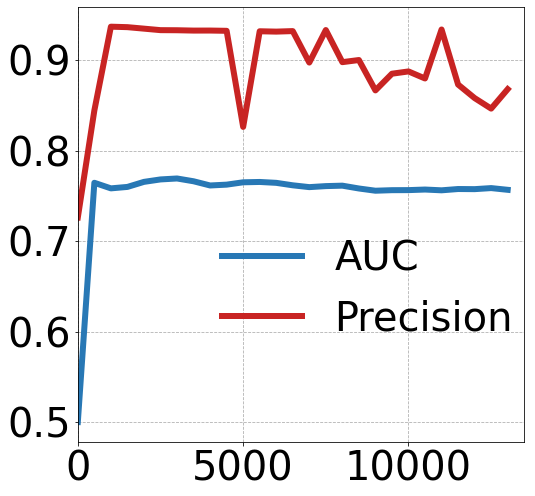

In [148]:
# fig 2 
# 特征数量和训练效果的关系
x = list(range(0,13500,500))
auc = lists.iloc[60,:].to_list()[1:28]
pre = lists.iloc[61,:].to_list()[1:28]

fig = plt.figure(figsize = (8,8)) 
plt.grid(linestyle = "--") 

plt.xlim(0,13500)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(5000)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(x,auc,linewidth = 6, color=color2[0], linestyle = "-", label="AUC")

plt.plot(x,pre, linewidth = 6, color=color2[3], linestyle = "-", label="Precision")

plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.legend(fontsize=ft, loc=4, bbox_to_anchor=(1.01, 0.2), ncol=1,borderaxespad = 0., frameon=False)
plt.savefig("./fig2-2.pdf", bbox_inches="tight")

In [149]:
auc = lists.iloc[60,:]
pre = lists.iloc[61,:].to_list()[1:28]
auc

0                samples
1                    0.5
2               0.764428
3               0.758264
4               0.759862
                  ...   
Unnamed: 132         NaN
Unnamed: 133         NaN
Unnamed: 134         NaN
Unnamed: 135         NaN
Unnamed: 136         NaN
Name: 60, Length: 137, dtype: object

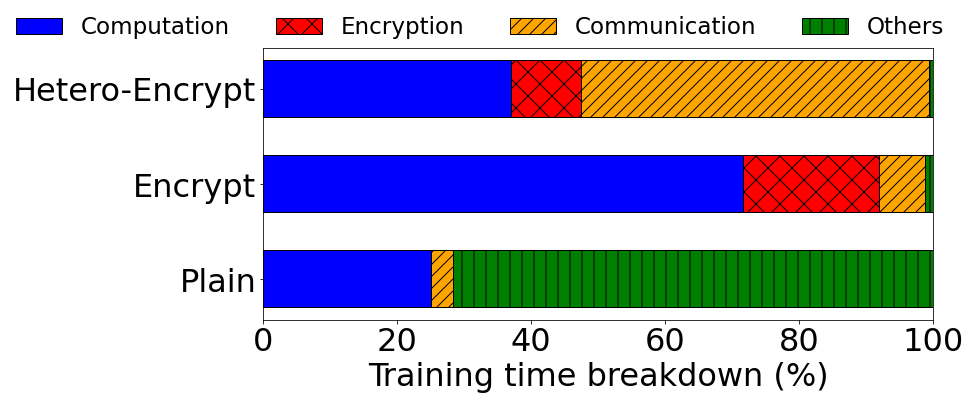

In [150]:
# fig 4
# 各成分的占比 mimic数据集 默认batchsize为1024
op1 = np.array([34.844,5889.691,5889.691]) # 计算时间
op2 = np.array([0,1669.967,1669.967])
op3 = np.array([4.65, 567.148, 8254.556])
op4 = np.array([100,100,100])

op_sum = op1 + op2 + op3 + op4

op1_regular = op1/op_sum*100
op2_regular = op2/op_sum*100
op3_regular = op3/op_sum*100
op4_regular = op4/op_sum*100


mode = ["Plain","Encrypt","Hetero-Encrypt"]
# 横向
bottom = 0
plt.figure(figsize=(12,5))
plt.xlabel("Training time breakdown (%)", fontsize=32)
plt.xlim(0,100)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.barh(mode, op1_regular, height=0.6, label="Computation", color=color3[2],edgecolor='black')

bottom = bottom + op1_regular
plt.barh(mode, op2_regular, height=0.6, label="Encryption", color=color3[0], left=bottom,edgecolor='black',hatch="X")

bottom = bottom + op2_regular
plt.barh(mode, op3_regular, height=0.6, label="Communication", color=color3[3], left=bottom,edgecolor='black',hatch="//") 

bottom = bottom + op3_regular
plt.barh(mode, op4_regular, height=0.6, label="Others", color=color3[1], left=bottom,edgecolor='black',hatch="|") 


plt.legend(fontsize=23, loc=4, ncol=4, bbox_to_anchor=(1.03, 1), frameon=False, borderaxespad=0.)

plt.savefig('./fig4.pdf', bbox_inches="tight")

<Figure size 1152x576 with 0 Axes>

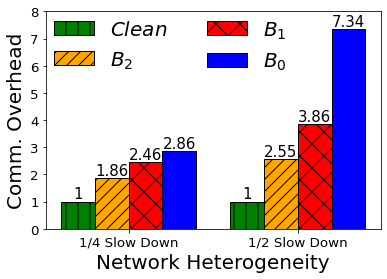

In [151]:
# fig 5-0
# backup 随着网络波动状况的效果变化
 
orgin= (1, 1) #第一种是1、3概率波动 ，第二种是1/2概率波动
b0 = (2.86,7.34)
b1 = (2.46,3.86)
b2 = (1.86,2.55)
 
ind = np.arange(len(b0))  # the x locations for the groups
width = 0.2  # the width of the bars

fig = plt.figure(figsize = (16,8)) 
fig, ax = plt.subplots()
plt.xlabel("Network Heterogeneity", fontsize=20)
plt.ylabel("Comm. Overhead", fontsize=20)
plt.xticks(fontsize=ft/3)
plt.yticks(fontsize=ft/3)
plt.ylim(0,8)
rects1 = ax.bar(ind - width*3/2, orgin, width, color=color3[1], label='$Clean$',edgecolor='black',hatch="|")
rects2 = ax.bar(ind - width/2, b2, width,color=color3[3], label='$B_{2}$',edgecolor='black',hatch="//")
rects3 = ax.bar(ind + width/2, b1, width,color=color3[0], label='$B_{1}$',edgecolor='black',hatch="X")
rects4 = ax.bar(ind + width*3/2, b0, width,color=color3[2], label='$B_{0}$',edgecolor='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
rects = [rects1, rects2, rects3, rects4]
for r in rects:
    for rect in r:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), size=15, ha='center', va='bottom')
plt.xticks(ind,('1/4 Slow Down', '1/2 Slow Down'))
plt.legend(fontsize=ft/2, loc=2, ncol=2, borderaxespad = 0., frameon=False)
plt.savefig("./fig5-0.pdf", bbox_inches="tight")


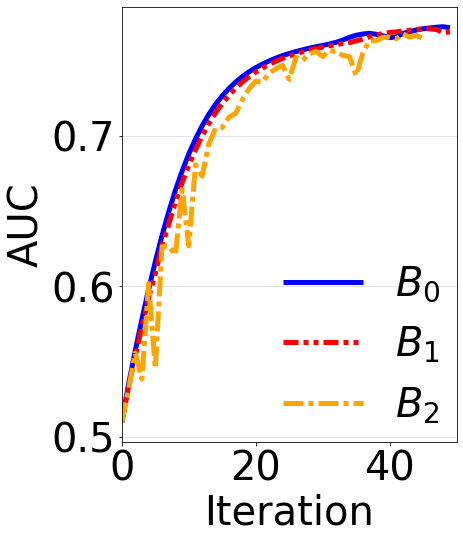

In [152]:
# fig 5-1
# MIMIC数据集的backup的实验结果图
# x0 = list(range(0,50*356,356))
# x1 = list(range(0,50*274,274))
# x2 = list(range(0,46*245,245))
x0 = list(range(0,50))
x1 = list(range(0,50))
x2 = list(range(0,46))

b0 = lists.iloc[81,:].to_list()[7:57]
b1 = lists.iloc[82,:].to_list()[7:57]
b2 = lists.iloc[83,:].to_list()[7:53]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Iteration", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xlim(0,50)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0), b0,linewidth = 5, color=color3[2], linestyle = (0, ()), label="$B_{0}$")
plt.plot(np.array(x1), b1,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="$B_{1}$")
plt.plot(np.array(x2), b2,linewidth = 5, color=color3[3], linestyle = (0, (4, 1,1,1)), label="$B_{2}$")
#plt.hlines(0.77, -10, 310, linestyles='dashed',linewidth=1.2,colors='#3C323C')
plt.legend(fontsize=ft, loc=4, ncol=1, borderaxespad = 0., frameon=False)
plt.savefig("./fig5-1.pdf", bbox_inches="tight")


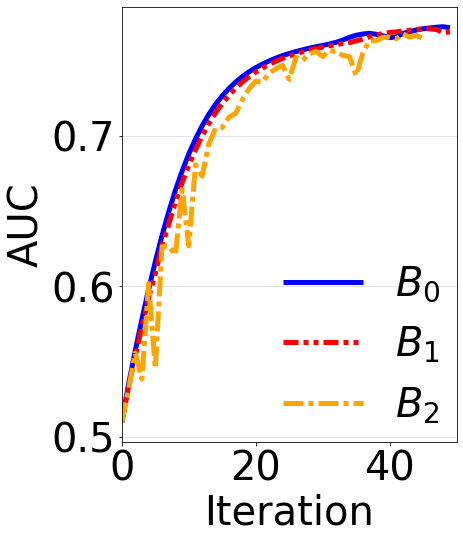

In [153]:
# fig 5-1
# MIMIC数据集的backup的实验结果图
# x0 = list(range(0,50*356,356))
# x1 = list(range(0,50*274,274))
# x2 = list(range(0,46*245,245))
x0 = list(range(0,50))
x1 = list(range(0,50))
x2 = list(range(0,46))

b0 = lists.iloc[81,:].to_list()[7:57]
b1 = lists.iloc[82,:].to_list()[7:57]
b2 = lists.iloc[83,:].to_list()[7:53]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Iteration", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xlim(0,50)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0), b0,linewidth = 5, color=color3[2], linestyle = (0, ()), label="$B_{0}$")
plt.plot(np.array(x1), b1,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="$B_{1}$")
plt.plot(np.array(x2), b2,linewidth = 5, color=color3[3], linestyle = (0, (4, 1,1,1)), label="$B_{2}$")
#plt.hlines(0.77, -10, 310, linestyles='dashed',linewidth=1.2,colors='#3C323C')
plt.legend(fontsize=ft, loc=4, ncol=1, borderaxespad = 0., frameon=False)
plt.savefig("./fig5-1.pdf", bbox_inches="tight")


[0.658468, 0.666816, 0.697507, 0.725952, 0.750945, 0.772708, 0.791719, 0.808296, 0.822856, 0.835618, 0.846898, 0.856857, 0.865674, 0.87351, 0.88048, 0.886745, 0.89236, 0.897431, 0.902009, 0.9062, 0.909969, 0.913446, 0.916626, 0.919566, 0.922288, 0.924804, 0.927128, 0.929304, 0.931358, 0.933268, 0.935042, 0.936698, 0.938237, 0.939684, 0.941039, 0.94229, 0.943425, 0.944469, 0.945386, 0.946143, 0.946703, 0.946961, 0.946726, 0.945539, 0.949681, 0.950169, 0.951251, 0.951145, 0.950341, 0.952837]


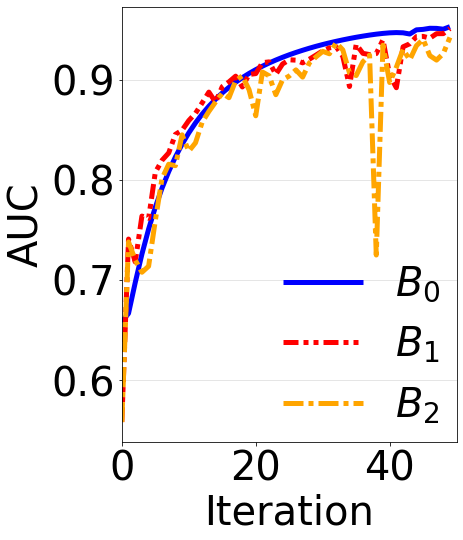

In [154]:
# fig 5-2
# Epsion数据集的backup的实验结果图 含null和stallness的对比
x0 = list(range(0,50))
x1 = list(range(0,50))
x2 = x1
x3 = list(range(0,50))
x4 = x3

b0 = lists.iloc[204,:].to_list()[7:57]
b1 = lists.iloc[205,:].to_list()[7:57]
b2 = lists.iloc[206,:].to_list()[7:57]
b3 = lists.iloc[207,:].to_list()[7:57]
b4 = lists.iloc[208,:].to_list()[7:57]
print(b0)

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Iteration", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xlim(0,50)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0), b0,linewidth = 5, color=color3[2], linestyle = (0, ()), label="$B_{0}$")
plt.plot(np.array(x3), b3,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="$B_{1}$")
plt.plot(np.array(x4), b4,linewidth = 5, color=color3[3], linestyle = (0, (4, 1,1,1)), label="$B_{2}$")
# plt.plot(np.array(x3), b3,linewidth = 3, color=color2[1], linestyle = "-", label="S2")
# plt.plot(np.array(x4), b4,linewidth = 3, color=color2[2], linestyle = "-", label="N2")

plt.legend(fontsize=ft, loc=4, ncol=1, borderaxespad = 0., frameon=False)
plt.savefig("./fig5-9.pdf", bbox_inches="tight")


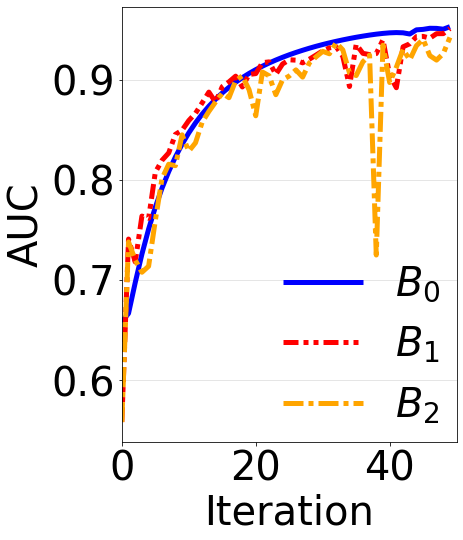

In [155]:
# fig 5-3
# NUS 数据集的实验对比
x0 = list(range(0,50))
x1 = list(range(0,50))
x2 = x1
x3 = list(range(0,50))
x4 = x3

b0 = lists.iloc[204,:].to_list()[7:57]
b1 = lists.iloc[205,:].to_list()[7:57]
b2 = lists.iloc[206,:].to_list()[7:57]
b3 = lists.iloc[207,:].to_list()[7:57]
b4 = lists.iloc[208,:].to_list()[7:57]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Iteration", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xlim(0,50)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0), b0,linewidth = 5, color=color3[2], linestyle = (0, ()), label="$B_{0}$")
plt.plot(np.array(x3), b3,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="$B_{1}$")
plt.plot(np.array(x4), b4,linewidth = 5, color=color3[3], linestyle = (0, (4, 1,1,1)), label="$B_{2}$")
# plt.plot(np.array(x3), b3,linewidth = 3, color=color2[1], linestyle = "-", label="S2")
# plt.plot(np.array(x4), b4,linewidth = 3, color=color2[2], linestyle = "-", label="N2")

plt.legend(fontsize=ft, loc=4, ncol=1, borderaxespad = 0., frameon=False)
plt.savefig("./fig5-9.pdf", bbox_inches="tight")


[0.783486, 0.902138, 0.920334, 0.927304, 0.931282, 0.933924, 0.935833, 0.937309, 0.938526, 0.93956, 0.940461, 0.94128, 0.942016, 0.942696, 0.943337, 0.94393, 0.944498, 0.945022, 0.945532, 0.946008, 0.946474, 0.946917, 0.947335, 0.94775, 0.948149, 0.948525, 0.948888, 0.949238, 0.949575, 0.949913, 0.950238, 0.950542, 0.950852, 0.951143, 0.951415, 0.951692, 0.951954, 0.952195, 0.952435, 0.952663, 0.952868, 0.953047, 0.953224, 0.953385, 0.953501, 0.95355, 0.95352, 0.953265, 0.952447, 0.950516]


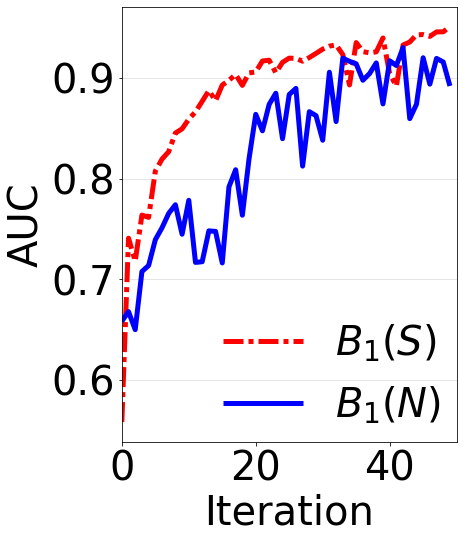

In [156]:
# fig 6-9
# NUS 数据集的ablation实验
# x0 = list(range(0,50*356,356))
# x1 = list(range(0,50*274,274))
# x2 = list(range(0,46*245,245))
x0 = list(range(0,50))
x1 = list(range(0,50))
x2 = list(range(0,50))
x4 = list(range(0,50))

b0 = lists.iloc[204,:].to_list()[7:57]
b1 = lists.iloc[205,:].to_list()[7:57]
b2 = lists.iloc[206,:].to_list()[7:57]
b3 = lists.iloc[207,:].to_list()[7:57]
b4 = lists.iloc[208,:].to_list()[7:57]
b5 = lists.iloc[209,:].to_list()[7:57]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Iteration", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xlim(0,50)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)
print(b2)
plt.plot(np.array(x0), b3,linewidth = 5, color=color3[0], linestyle = (0, (4, 1,1,1)), label="$B_{1}(S)$")
# plt.plot(np.array(x1), b1,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="$B_{1}$")
plt.plot(np.array(x2), b5,linewidth = 5, color=color3[2], linestyle = (0, ()), label="$B_{1}(N)$")
#plt.hlines(0.77, -10, 310, linestyles='dashed',linewidth=1.2,colors='#3C323C')
plt.legend(fontsize=ft, loc=4, ncol=1, borderaxespad = 0., frameon=False)
plt.savefig("./fig6-9.pdf", bbox_inches="tight")


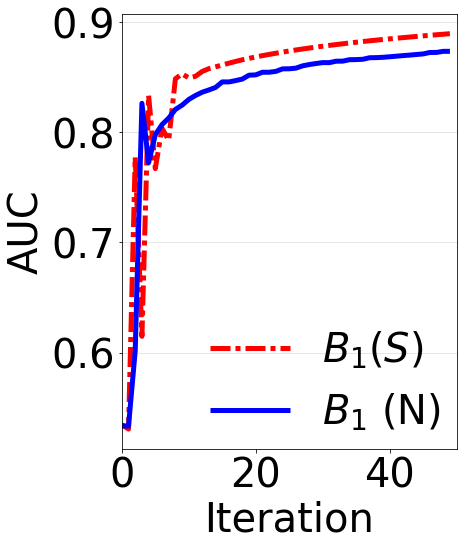

In [157]:
# fig 5-2
# Epsion数据集的backup的实验结果图 含null和stallness的对比
x0 = list(range(0,50))
x1 = list(range(0,50))
x2 = x1
x3 = list(range(0,50))
x4 = x3

b0 = lists.iloc[100,:].to_list()[9:59]
b1 = lists.iloc[101,:].to_list()[9:59]
b2 = lists.iloc[102,:].to_list()[9:59]
b3 = lists.iloc[103,:].to_list()[9:59]
b4 = lists.iloc[104,:].to_list()[9:59]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Iteration", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xlim(0,50)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0), b1,linewidth = 5, color=color3[0], linestyle = (0, (4, 1,1,1)), label="$B_{1} (S)$")
# plt.plot(np.array(x1), b1,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="$B_{1}$")
plt.plot(np.array(x2), b2,linewidth = 5, color=color3[2], linestyle = (0, ()), label="$B_{1}$ (N)")
# plt.plot(np.array(x3), b3,linewidth = 3, color=color2[1], linestyle = "-", label="S2")
# plt.plot(np.array(x4), b4,linewidth = 3, color=color2[2], linestyle = "-", label="N2")

plt.legend(fontsize=ft, loc=4, ncol=1, borderaxespad = 0., frameon=False)
plt.savefig("./fig5-4.pdf", bbox_inches="tight")


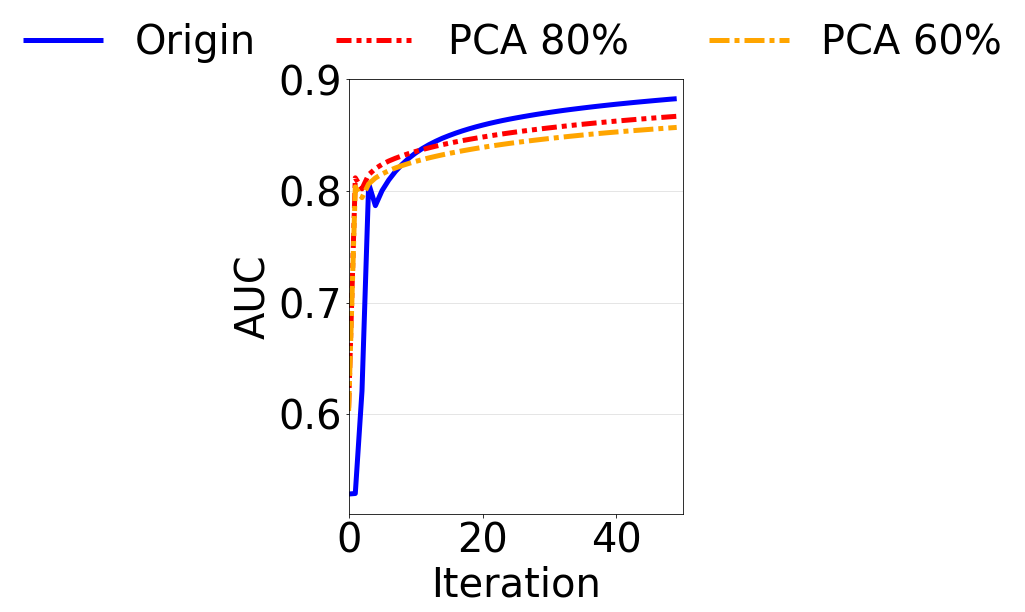

In [158]:
# fig7-1
# PCA的结果 Epsilon pca 100 80 60

x0 = list(range(0,50))
x1 = list(range(0,50))
x2 = list(range(0,50))

b0 = lists.iloc[129,:].to_list()[9:59]
b1 = lists.iloc[130,:].to_list()[9:59]
b2 = lists.iloc[131,:].to_list()[9:59]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Iteration", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlim(0, 50)
# plt.ylim(0.5,0.9)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0), b0,linewidth = 5, color=color3[2], linestyle = (0, ()), label="Origin")
plt.plot(np.array(x1), b1,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="PCA 80%")
plt.plot(np.array(x2), b2,linewidth = 5, color=color3[3], linestyle = (0, (4, 1,1,1)), label="PCA 60%")

plt.legend(fontsize=ft, loc=4, ncol=3, bbox_to_anchor=(2, 1),borderaxespad = 0., frameon=False)
plt.savefig("./fig7-1.pdf", bbox_inches="tight")


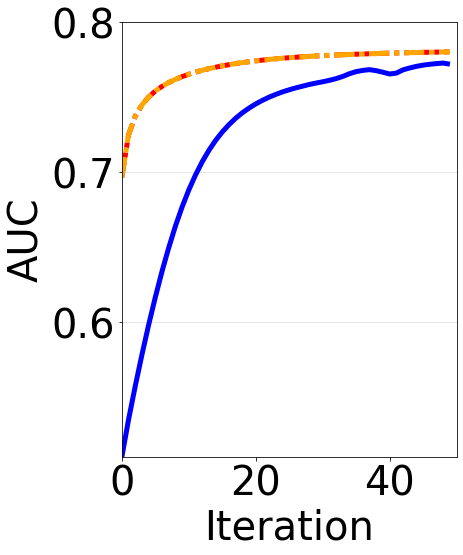

In [159]:
# fig 7-2
# PCA的结果 MIMIC pca 100 80 60 40 20 step维度
# x0 = list(range(0,50*123,123))
# x1 = list(range(0,50*96,96))
# x2 = list(range(0,50*73,73))
# x3 = list(range(0,50*55,55))
# x4 = list(range(0,50*37,37))

x0 = list(range(0,50))
x1 = list(range(0,50))
x2 = list(range(0,50))
x3 = list(range(0,50))
x4 = list(range(0,50))

b0 = lists.iloc[116,:].to_list()[7:57]
b1 = lists.iloc[117,:].to_list()[7:57]
b2 = lists.iloc[118,:].to_list()[7:57]
b3 = lists.iloc[119,:].to_list()[7:57]
b4 = lists.iloc[120,:].to_list()[7:57]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Iteration", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xlim(0,50)
plt.ylim(0.51,0.8)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0), b0,linewidth = 5, color=color3[2], linestyle = (0, ()), label="Origin")
plt.plot(np.array(x1), b1,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="PCA 80%")
plt.plot(np.array(x2), b2,linewidth = 5, color=color3[3], linestyle = (0, (4, 1,1,1)), label="PCA 60%")
# plt.plot(np.array(x3), b3,linewidth = 2, color=color1[3], linestyle = "-", label="60")
# plt.plot(np.array(x4), b4,linewidth = 2, color=color1[4], linestyle = "-", label="80")


plt.savefig("./fig7-2.pdf", bbox_inches="tight")

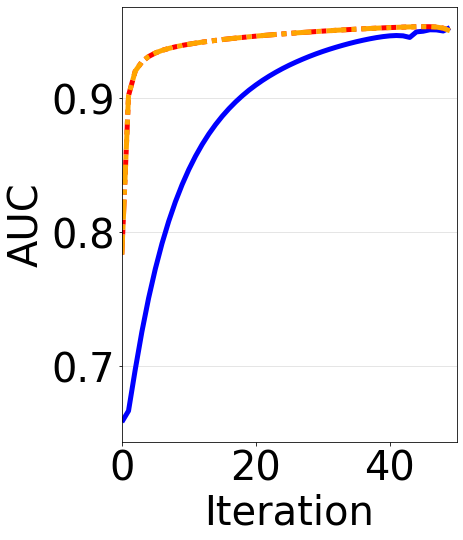

In [160]:
# fig 7-2
# PCA的结果 MIMIC pca 100 80 60 40 20 step维度
# x0 = list(range(0,50*123,123))
# x1 = list(range(0,50*96,96))
# x2 = list(range(0,50*73,73))
# x3 = list(range(0,50*55,55))
# x4 = list(range(0,50*37,37))

x0 = list(range(0,50))
x1 = list(range(0,50))
x2 = list(range(0,50))
x3 = list(range(0,50))
x4 = list(range(0,50))

b0 = lists.iloc[204,:].to_list()[7:57]
b1 = lists.iloc[205,:].to_list()[7:57]
b2 = lists.iloc[206,:].to_list()[7:57]
b3 = lists.iloc[207,:].to_list()[7:57]
b4 = lists.iloc[208,:].to_list()[7:57]
b5 = lists.iloc[209,:].to_list()[7:57]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Iteration", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xlim(0,50)
# plt.ylim(0.51,0.8)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0), b0,linewidth = 5, color=color3[2], linestyle = (0, ()), label="Origin")
plt.plot(np.array(x1), b1,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="PCA 80%")
plt.plot(np.array(x2), b2,linewidth = 5, color=color3[3], linestyle = (0, (4, 1,1,1)), label="PCA 60%")
# plt.plot(np.array(x3), b3,linewidth = 2, color=color1[3], linestyle = "-", label="60")
# plt.plot(np.array(x4), b4,linewidth = 2, color=color1[4], linestyle = "-", label="80")


plt.savefig("./fig7-9.pdf", bbox_inches="tight")

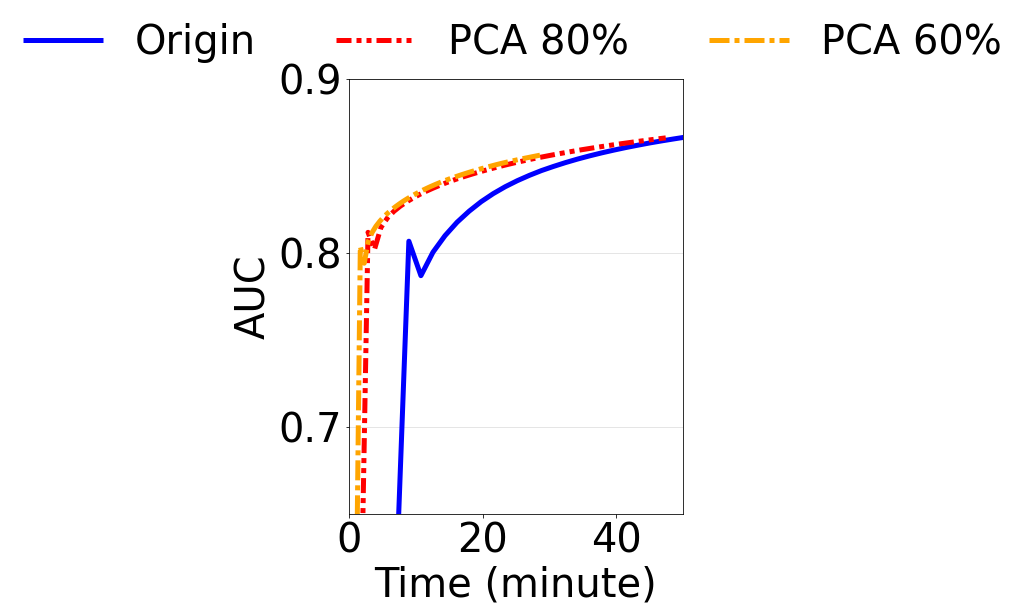

In [161]:
# fig7-2
# PCA的结果 Epsilon pca 100 80 60

# x0 = list(range(0,100*58,58))
# x1 = list(range(0,100*48,48))
# x2 = list(range(0,100*38,38))

x0 = list(range(0,50*108,108))
x1 = list(range(0,50*58,58))
x2 = list(range(0,50*35,35))

b0 = lists.iloc[100,:].to_list()[7:57]
b1 = lists.iloc[130,:].to_list()[7:57]
b2 = lists.iloc[131,:].to_list()[7:57]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Time (minute)", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlim(0,50)
plt.ylim(0.65,0.9)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(20)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0)/60, b0,linewidth = 5, color=color3[2], linestyle = (0, ()), label="Origin")
plt.plot(np.array(x1)/60, b1,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="PCA 80%")
plt.plot(np.array(x2)/60, b2,linewidth = 5, color=color3[3], linestyle = (0, (4, 1,1,1)), label="PCA 60%")

plt.legend(fontsize=ft, loc=4, ncol=3, bbox_to_anchor=(2, 1),borderaxespad = 0., frameon=False)
plt.savefig("./fig7-3.pdf", bbox_inches="tight")


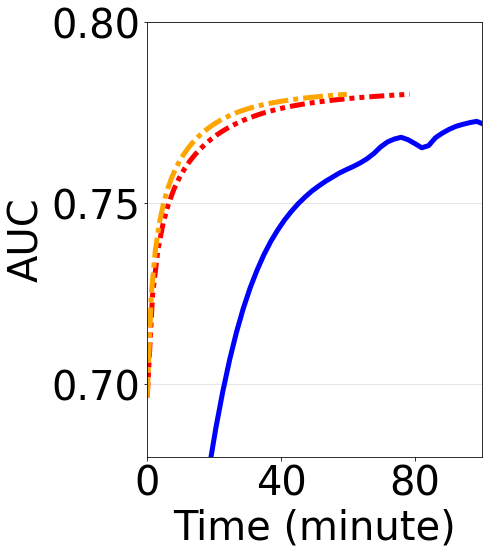

In [162]:
# fig 7-4
# PCA的结果 MIMIC pca 100 80 60 40 20 time维度
x0 = list(range(0,50*123,123))
x1 = list(range(0,50*96,96))
x2 = list(range(0,50*73,73))
x3 = list(range(0,50*55,55))
x4 = list(range(0,50*37,37))

# x0 = list(range(0,50))
# x1 = list(range(0,50))
# x2 = list(range(0,50))
# x3 = list(range(0,50))
# x4 = list(range(0,50))

b0 = lists.iloc[116,:].to_list()[7:57]
b1 = lists.iloc[117,:].to_list()[7:57]
b2 = lists.iloc[118,:].to_list()[7:57]
b3 = lists.iloc[119,:].to_list()[7:57]
b4 = lists.iloc[120,:].to_list()[7:57]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Time (minute)", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlim(0,100)
plt.ylim(0.68,0.8)
ax=plt.gca()
y_major_locator=MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(40)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0)/60, b0,linewidth = 5, color=color3[2], linestyle = (0, ()), label="Origin")
plt.plot(np.array(x1)/60, b1,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="PCA 80%")
plt.plot(np.array(x2)/60, b2,linewidth = 5, color=color3[3], linestyle = (0, (4, 1,1,1)), label="PCA 60%")
#plt.plot(np.array(x3)/60, b3,linewidth = 2, color=color1[3], linestyle = "-", label="PCA 40")
#plt.plot(np.array(x4)/60, b4,linewidth = 2, color=color1[4], linestyle = "-", label="PCA 20")

# plt.legend(fontsize=ft, loc=4, ncol=3, bbox_to_anchor=(2, 1),borderaxespad = 0., frameon=False)
plt.savefig("./fig7-4.pdf", bbox_inches="tight")

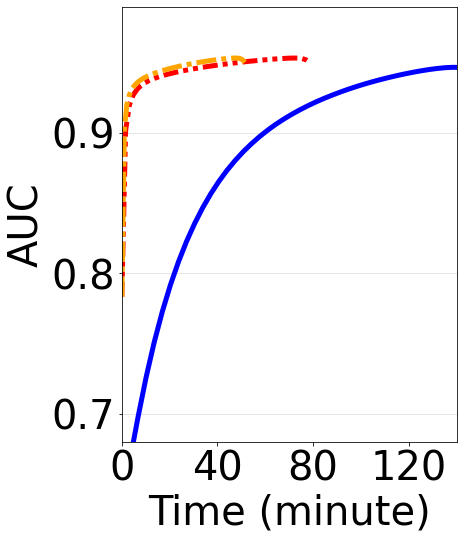

In [163]:
# fig 8-3
# PCA的结果 NUS pca 100 80 60 40 20 time维度
x0 = list(range(0,50*203,203))
x1 = list(range(0,50*96,96))
x2 = list(range(0,50*63,63))
x3 = list(range(0,50*55,55))
x4 = list(range(0,50*37,37))

# x0 = list(range(0,50))
# x1 = list(range(0,50))
# x2 = list(range(0,50))
# x3 = list(range(0,50))
# x4 = list(range(0,50))

b0 = lists.iloc[204,:].to_list()[7:57]
b1 = lists.iloc[205,:].to_list()[7:57]
b2 = lists.iloc[206,:].to_list()[7:57]
b3 = lists.iloc[207,:].to_list()[7:57]
b4 = lists.iloc[208,:].to_list()[7:57]
b5 = lists.iloc[209,:].to_list()[7:57]

fig = plt.figure(figsize = (6,8)) 
plt.xlabel("Time (minute)", fontsize=40)
plt.ylabel("AUC", fontsize=40)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlim(0,140)
plt.ylim(0.68,0.99)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(40)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0)/60, b0,linewidth = 5, color=color3[2], linestyle = (0, ()), label="Origin")
plt.plot(np.array(x1)/60, b1,linewidth = 5, color=color3[0], linestyle = (0, (3, 1,1,1,1,1)), label="PCA 80%")
plt.plot(np.array(x2)/60, b2,linewidth = 5, color=color3[3], linestyle = (0, (4, 1,1,1)), label="PCA 60%")
#plt.plot(np.array(x3)/60, b3,linewidth = 2, color=color1[3], linestyle = "-", label="PCA 40")
#plt.plot(np.array(x4)/60, b4,linewidth = 2, color=color1[4], linestyle = "-", label="PCA 20")

# plt.legend(fontsize=ft, loc=4, ncol=3, bbox_to_anchor=(2, 1),borderaxespad = 0., frameon=False)
plt.savefig("./fig8-9.pdf", bbox_inches="tight")

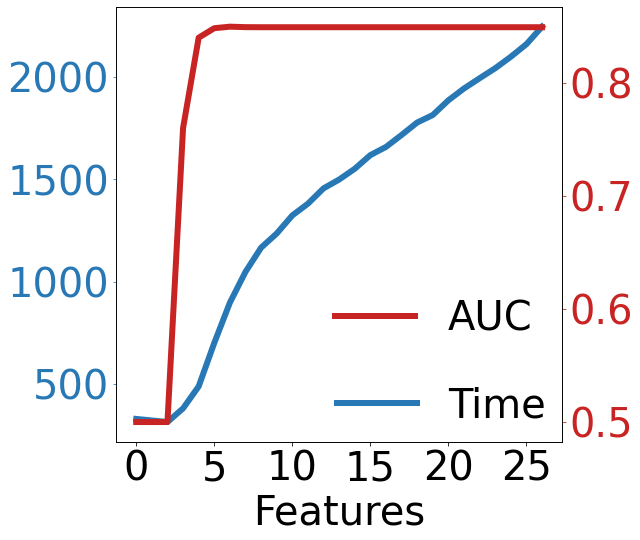

In [164]:
# fig 8
# 浮点数定点化的影响
x = list(range(0,27))
p = np.array(lists.iloc[142:169,1].to_list()[:])
auc = np.array(lists.iloc[142:169,36].to_list()[:])

fig = plt.figure(figsize = (8,8)) 
#plt.grid(linestyle = "--") 
# plt.xticks(fontsize=28)
# plt.yticks(fontsize=35)

ax1 = fig.add_subplot(111)
ax1.plot(x,p,linewidth = 6, color=color2[0], linestyle = "-", label="Time")
plt.tick_params(axis='y',colors=color2[0])

y_major_locator=MultipleLocator(500)
ax1.yaxis.set_major_locator(y_major_locator)
# x_major_locator=MultipleLocator(200)
# ax1.xaxis.set_major_locator(x_major_locator)

plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax1.set_xlabel('Features',  fontsize=ft)
plt.legend(fontsize=ft, loc=4, ncol=1, bbox_to_anchor=(1., 0), borderaxespad = 0., frameon=False)

ax2 = ax1.twinx()



ax2.plot(x,auc, linewidth = 6, color=color2[3], linestyle = "-", label="AUC")
plt.tick_params(axis='y',colors=color2[3])
y_major_locator=MultipleLocator(0.1)
ax2.yaxis.set_major_locator(y_major_locator)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.legend(fontsize=ft, loc=4, bbox_to_anchor=(0.968, 0.2), ncol=1,borderaxespad = 0., frameon=False)
plt.savefig("./fig8.pdf", bbox_inches="tight")

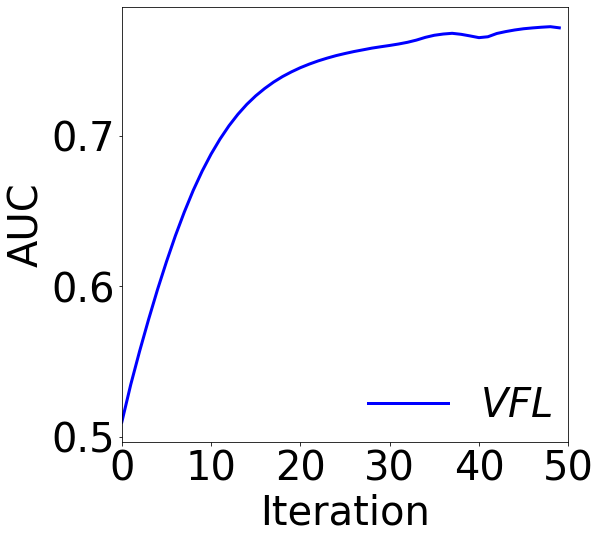

In [165]:
# fig 5-1
# MIMIC数据集的backup的实验结果图
# x0 = list(range(0,50*356,356))
# x1 = list(range(0,50*274,274))
# x2 = list(range(0,46*245,245))
x0 = list(range(0,50))
x1 = list(range(0,50))
x2 = list(range(0,46))

b0 = lists.iloc[81,:].to_list()[7:57]
b1 = lists.iloc[82,:].to_list()[7:57]
b2 = lists.iloc[83,:].to_list()[7:53]

fig = plt.figure(figsize = (8,8)) 
plt.xlabel("Iteration", fontsize=40)
plt.ylabel("AUC", fontsize=40)
#plt.grid(linestyle = "--") 
plt.xlim(0,50)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)

plt.plot(np.array(x0), b0,linewidth = 3, color=color3[2], linestyle = "-", label="$VFL$")
# plt.plot(np.array(x1), b1,linewidth = 3, color=color3[0], linestyle = "-", label="$B_{1}$")
# plt.plot(np.array(x2), b2,linewidth = 3, color=color3[3], linestyle = "-", label="$B_{2}$")
#plt.hlines(0.77, -10, 310, linestyles='dashed',linewidth=1.2,colors='#3C323C')
plt.legend(fontsize=ft, loc=4, ncol=1, borderaxespad = 0., frameon=False)
plt.savefig("./iteration.png", bbox_inches="tight")
